### 부스팅(Boosting)

In [1]:
from sklearn.datasets import load_wine
wine = load_wine()

In [3]:
from sklearn.preprocessing import StandardScaler
wine_std = StandardScaler().fit_transform(wine.data)

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    wine_std, wine.target, stratify=wine.target, test_size=0.2, random_state=2023
)

#### 1. XGBoot(eXtra Gradient Boost)
- 설치 : pip install xgboost

In [5]:
import xgboost
xgboost.__version__

'1.7.5'

In [6]:
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.get_params()


{'objective': 'binary:logistic',
 'use_label_encoder': None,
 'base_score': None,
 'booster': None,
 'callbacks': None,
 'colsample_bylevel': None,
 'colsample_bynode': None,
 'colsample_bytree': None,
 'early_stopping_rounds': None,
 'enable_categorical': False,
 'eval_metric': None,
 'feature_types': None,
 'gamma': None,
 'gpu_id': None,
 'grow_policy': None,
 'importance_type': None,
 'interaction_constraints': None,
 'learning_rate': None,
 'max_bin': None,
 'max_cat_threshold': None,
 'max_cat_to_onehot': None,
 'max_delta_step': None,
 'max_depth': None,
 'max_leaves': None,
 'min_child_weight': None,
 'missing': nan,
 'monotone_constraints': None,
 'n_estimators': 100,
 'n_jobs': None,
 'num_parallel_tree': None,
 'predictor': None,
 'random_state': None,
 'reg_alpha': None,
 'reg_lambda': None,
 'sampling_method': None,
 'scale_pos_weight': None,
 'subsample': None,
 'tree_method': None,
 'validate_parameters': None,
 'verbosity': None}

In [7]:
xgb.fit(X_train, y_train)
pred_xgb = xgb.predict(X_test)
xgb.score(X_test, y_test)

1.0

- 시각화

In [8]:
from xgboost import plot_importance as xgb_pi
import matplotlib.pyplot as plt

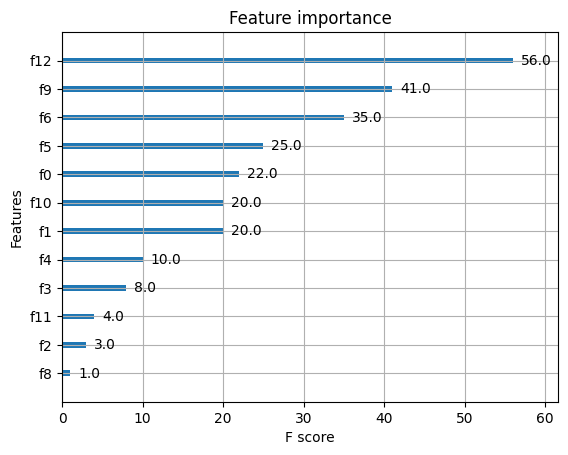

In [11]:
xgb_pi(xgb)
plt.show()

- GridSearchCV

In [12]:
params = {'max_depth':[3, 4, 5, 6]}

In [14]:
from sklearn.model_selection import GridSearchCV
grid_xgb = GridSearchCV(xgb, params, scoring='accuracy', cv=5)
grid_xgb.fit(X_train, y_train)
grid_xgb.best_params_


{'max_depth': 3}

In [15]:
grid_xgb.best_estimator_.score(X_test, y_test)

0.9722222222222222

#### 2. LightGBM
- 설치 : pip install lightgbm

In [17]:
import lightgbm
lightgbm.__version__

'3.3.5'

In [18]:
from lightgbm import LGBMClassifier
lgb = LGBMClassifier()
lgb.get_params()

{'boosting_type': 'gbdt',
 'class_weight': None,
 'colsample_bytree': 1.0,
 'importance_type': 'split',
 'learning_rate': 0.1,
 'max_depth': -1,
 'min_child_samples': 20,
 'min_child_weight': 0.001,
 'min_split_gain': 0.0,
 'n_estimators': 100,
 'n_jobs': -1,
 'num_leaves': 31,
 'objective': None,
 'random_state': None,
 'reg_alpha': 0.0,
 'reg_lambda': 0.0,
 'silent': 'warn',
 'subsample': 1.0,
 'subsample_for_bin': 200000,
 'subsample_freq': 0}

In [19]:
evals = [(X_test, y_test)] # 검증해라
lgb.fit(X_train, y_train, eval_set=evals, eval_metric='logloss', verbose=True)

[1]	valid_0's multi_logloss: 0.941996
[2]	valid_0's multi_logloss: 0.832568
[3]	valid_0's multi_logloss: 0.747743
[4]	valid_0's multi_logloss: 0.670139
[5]	valid_0's multi_logloss: 0.611701
[6]	valid_0's multi_logloss: 0.557255
[7]	valid_0's multi_logloss: 0.5066
[8]	valid_0's multi_logloss: 0.467544
[9]	valid_0's multi_logloss: 0.42232
[10]	valid_0's multi_logloss: 0.391928
[11]	valid_0's multi_logloss: 0.354272
[12]	valid_0's multi_logloss: 0.323114
[13]	valid_0's multi_logloss: 0.294561
[14]	valid_0's multi_logloss: 0.27047
[15]	valid_0's multi_logloss: 0.248188
[16]	valid_0's multi_logloss: 0.226466
[17]	valid_0's multi_logloss: 0.20706
[18]	valid_0's multi_logloss: 0.190334
[19]	valid_0's multi_logloss: 0.177716
[20]	valid_0's multi_logloss: 0.162546
[21]	valid_0's multi_logloss: 0.149056
[22]	valid_0's multi_logloss: 0.140279
[23]	valid_0's multi_logloss: 0.128097
[24]	valid_0's multi_logloss: 0.118336
[25]	valid_0's multi_logloss: 0.111064
[26]	valid_0's multi_logloss: 0.102929


c:\Users\YONSAI\anaconda3\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


LGBMClassifier()

In [20]:
lgb.score(X_test, y_test)

1.0

- 시각화

In [21]:
from lightgbm import plot_metric, plot_importance, plot_tree

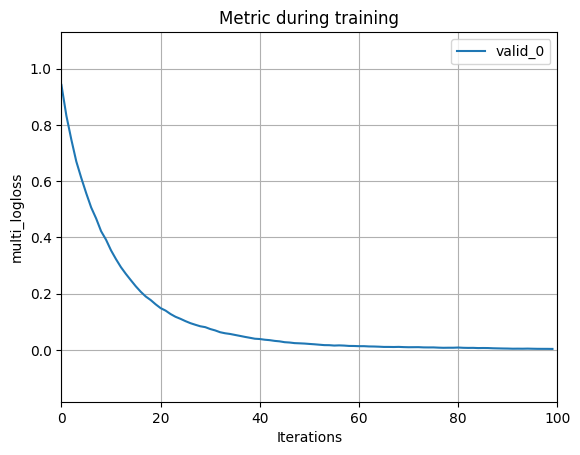

In [22]:
# 손실값이 떨어진다.
plot_metric(lgb);

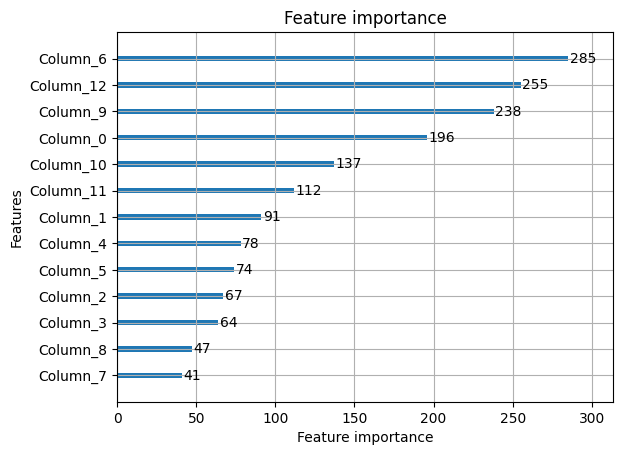

In [23]:
plot_importance(lgb);

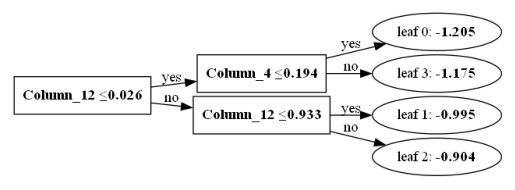

In [26]:
plot_tree(lgb);

- 두 모델 비교

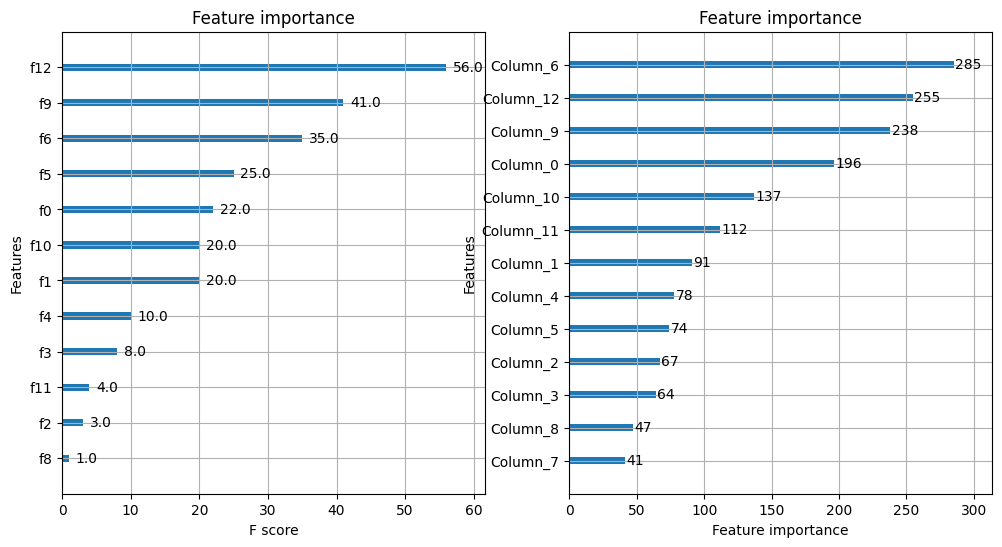

In [25]:
fig, ax = plt.subplots(1, 2, figsize=(12, 6))
xgb_pi(xgb, ax=ax[0])
plot_importance(lgb, ax=ax[1])
plt.show()